# **<center><font style="color:rgb(100,109,254)">Module 5: Real-Time Style Transfer Painting Portrait</font> </center>**

<center>
    <img src='https://drive.google.com/uc?export=download&id=1RENayQoiXrIIpuheGqM3G6UOAqVfEj9b'> 
</center>
    

## **<font style="color:rgb(134,19,348)"> Module Outline </font>**

The module can be split into the following parts:

- *Lesson 1: Introduction to Neural Style Transfer Theory*

- ***Lesson 2:* Apply Neural Style Transfer with OpenCV** *(This Tutorial)*

- *Lesson 3: Build the Final Application*

**Please Note**, these Jupyter Notebooks are not for sharing; do read the Copyright message below the Code License Agreement section which is in the last cell of this notebook.
-Taha Anwar

Alright, let's get started.

### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

First, we will import the required libraries.

In [3]:
import os
import cv2
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

## **<font style="color:rgb(134,19,348)">Create a Function to apply Neural Style Transfer</font>**

Now we will create a function **`applyNeuralStyleTransfer()`** that will utilize different neural style transfer models (trained using Johnson et al. approach) to apply Neural Style Transfer on images/frames. The function will visualize the generated image along with the original (content) image and the style image (on which the model is trained) or will simply return the generated image depending upon the passed arguments.

In [4]:
def applyNeuralStyleTransfer(image, net, style_image=None, display=True):
    '''
    This function will apply neural style transfer on an image.
    Args:
        image:       The input (content) image whose style needs to be transferred.
        net:         A neural style transfer model (trained on a style image) loaded from the disk.
        style_image: The style image on which the neural style transfer model is trained on.
        display:     A boolean value that is if set to true the function displays the input 
                     (content) image, the style image, and the generated image and returns nothing.
    Returns:
        output_image: A copy of the input image with the neural style transfer applied.
    '''
    
    # Get the height and width of the image.
    image_height, image_width, _ = image.shape
    
    # Create a copy of the input image
    output_image = image.copy()
    
    # Resize the image to make its width 600, while keeping its aspect ratio constant. 
    output_image = cv2.resize(output_image, dsize=(600, int((600/output_image.shape[1])*output_image.shape[0])))
    
    # Get the new height and width of the image.
    new_height, new_width, _ = output_image.shape
    
    # Perform the required pre-processings on the image.
    # This will apply mean subtraction to all 3 channels of the image,
    # and will create a 4-dimensional blob from the image.
    blob = cv2.dnn.blobFromImage(output_image, scalefactor=1.0, size=(new_width, new_height), 
                                 mean=(103.939, 116.779, 123.680), swapRB=False, crop=False)
    
    # Set the input for the model.
    net.setInput(blob)
    
    # Get the current time before performing neural style transfer.
    start = time()
    
    # Perform the neural style transfer on the image.
    output_image = net.forward()
    
    # Get the current time after performing neural style transfer.
    end = time()
    
    # Reshape the generated output of the model.
    # This will change the shape from (1, number of channels, height, width) to (number of channels, height, width).
    output_image = output_image.reshape((3, output_image.shape[2], output_image.shape[3]))
       
    # Add the values back in, that we had subtracted during the pre-processing step.
    output_image[0] += 103.939
    output_image[1] += 116.779
    output_image[2] += 123.680
    
    # Clip the values < 0. This will set the values < 0 in the image to 0.
    output_image[output_image<0] = 0
    
    # Divide the image pixel values with the maximum value in the image, to get the range of 0-1.
    output_image = output_image/output_image.max()
    
    # Change the array ordering to the (height, width, number of channels).
    output_image = output_image.transpose(1, 2, 0)
    
    # Resize the ouput image back to its original size.
    output_image = cv2.resize(output_image, (image_width, image_height))
    
    # Check if the input image and the output image are specified to be displayed.
    if display:
        
        # Display the time take by the process.
        print('Time taken: '+str(round(end - start, 2))+' Seconds.')
        
        # Display the input (content) image, the style image and the output (generated) image.
        plt.figure(figsize=[15,15])
        plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Content Image");plt.axis('off');
        plt.subplot(132);plt.imshow(style_image[:,:,::-1]);plt.title("Style Image");plt.axis('off');
        plt.subplot(133);plt.imshow(output_image[:,:,::-1]);plt.title("Generated Image");plt.axis('off');
                
    # Otherwise.
    else:
        
        # Return the output image.
        return output_image

Now we will utilize the function **`applyNeuralStyleTransfer()`** created above to perform neural style transfer on a few sample images and display the results.

Time taken: 8.13 Seconds.


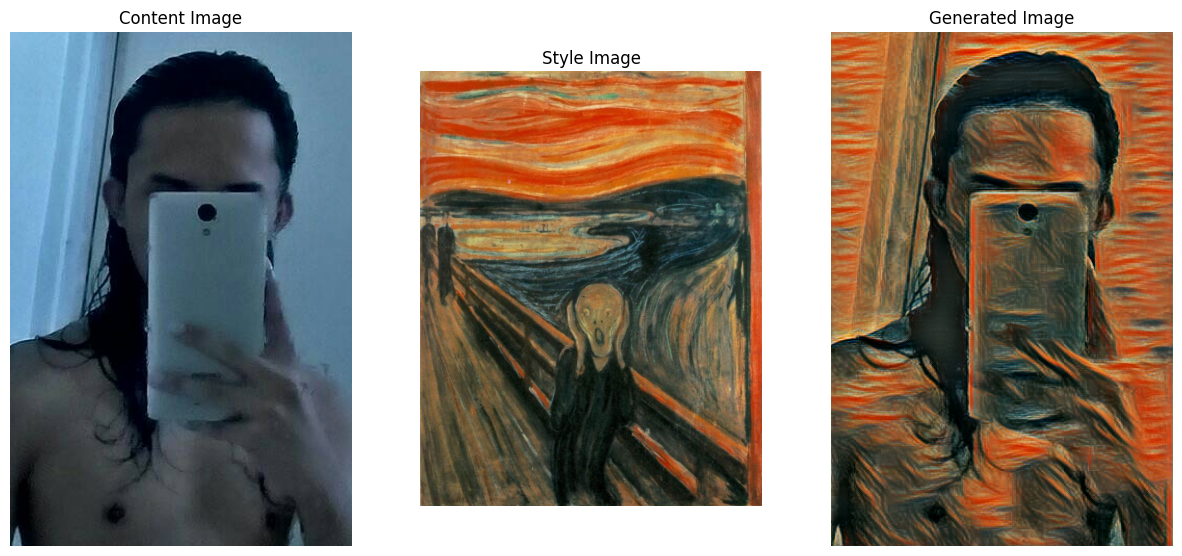

In [10]:
# Read a sample image and apply neural style transfer on it.
#image = cv2.imread('media/sample1.jpg')
image = cv2.imread('media/test.jpg')
applyNeuralStyleTransfer(image, cv2.dnn.readNetFromTorch('models/the_scream.t7'),
                         cv2.imread('media/style_images/the_scream.jpeg'))

Time taken: 6.01 Seconds.


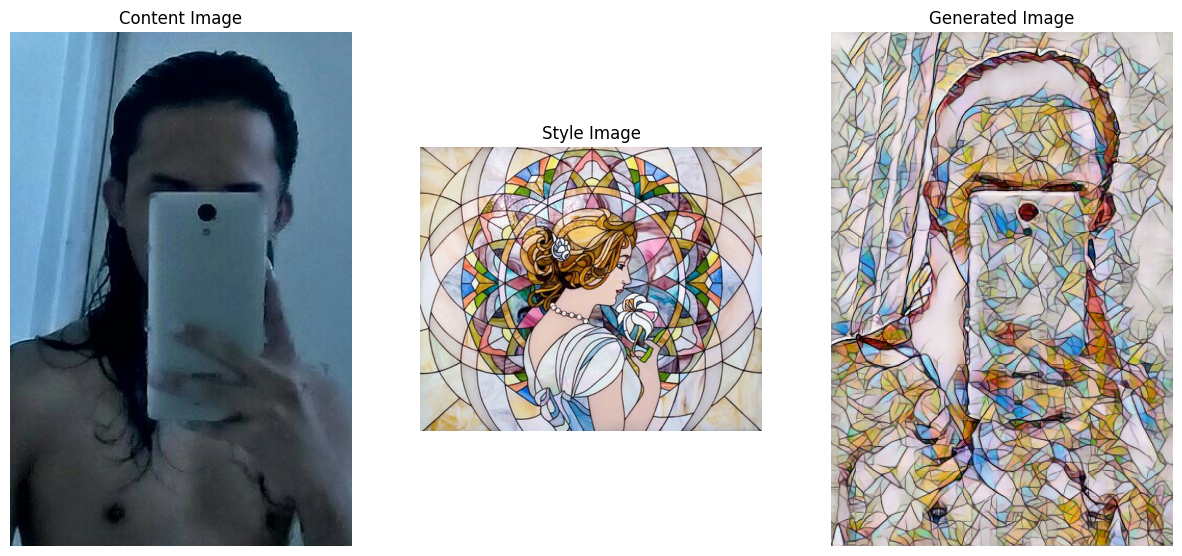

In [9]:
# Read another sample image and apply neural style transfer on it.
#image = cv2.imread('media/sample2.jpg')
image = cv2.imread('media/test.jpg')
applyNeuralStyleTransfer(image, cv2.dnn.readNetFromTorch('models/mosaic.t7'), 
                         cv2.imread('media/style_images/mosaic.jpeg'))

Time taken: 7.6 Seconds.


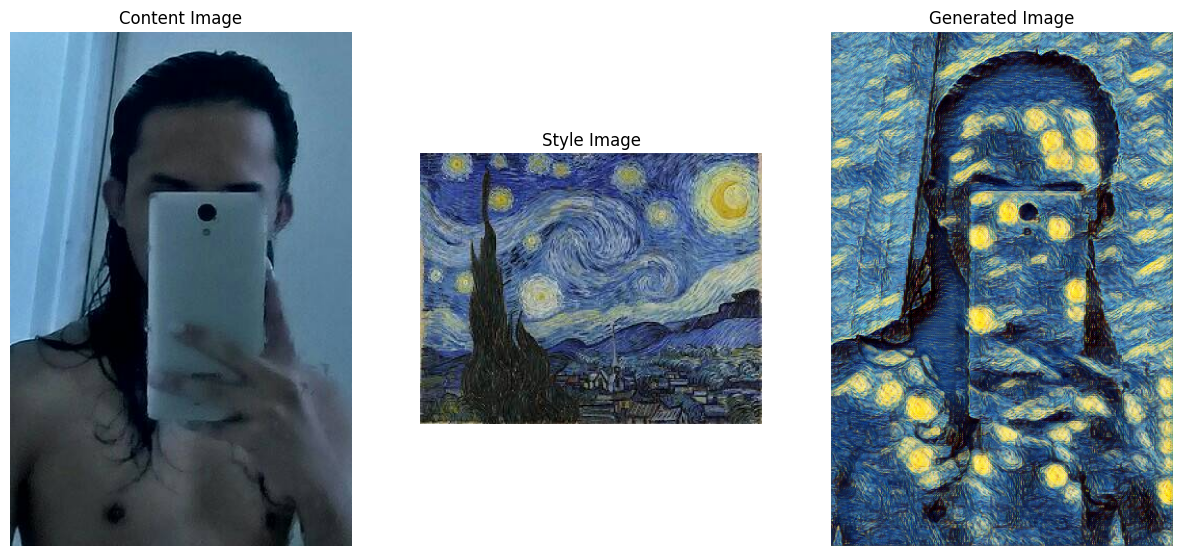

In [11]:
# Read another sample image and apply neural style transfer on it.
#image = cv2.imread('media/sample3.jpg')
image = cv2.imread('media/test.jpg')
applyNeuralStyleTransfer(image, cv2.dnn.readNetFromTorch('models/starry_night.t7'), 
                         cv2.imread('media/style_images/starry_night.jpeg'))

Time taken: 9.44 Seconds.


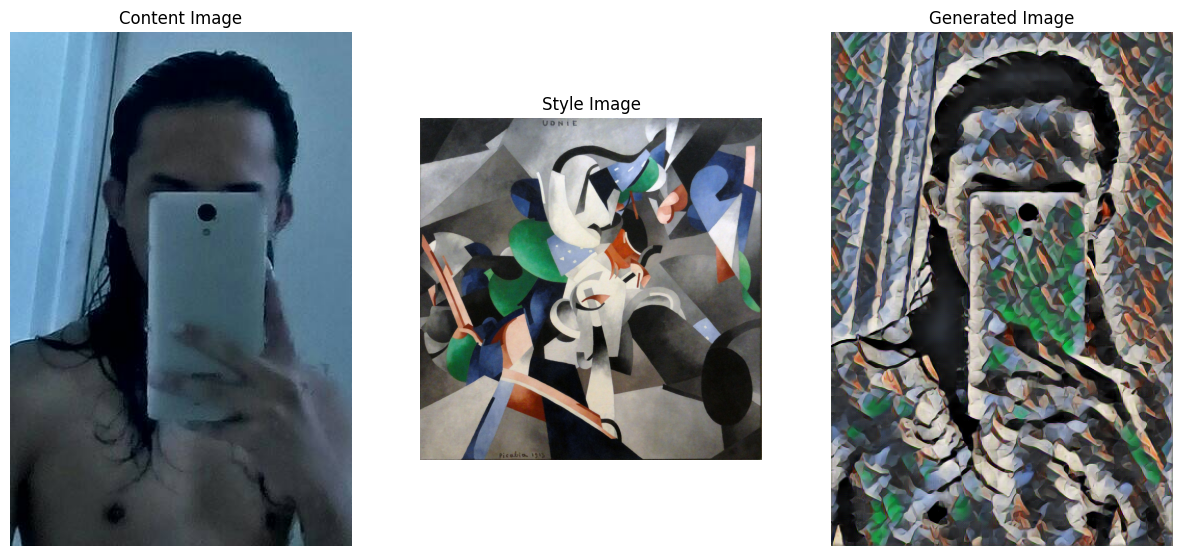

In [12]:
# Read another sample image and apply neural style transfer on it.
#image = cv2.imread('media/sample4.jpg')
image = cv2.imread('media/test.jpg')
applyNeuralStyleTransfer(image, cv2.dnn.readNetFromTorch('models/udnie.t7'),
                        cv2.imread('media/style_images/udnie.jpeg'))

Fascinating! right? completely changes the feel of an image and makes it look a lot cooler. Now let's check if it can work on a webcam feed in real-time on a CPU.

In [13]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create a named window for resizing purposes.
cv2.namedWindow('Neural Style Transfer', cv2.WINDOW_NORMAL)

# Specify the path of the directory which contains the trained models.
model_folder = 'models'

# Initialize a list to store the loaded models.
models = []

# Iterate over the models files in the directory.
for model_name in os.listdir(model_folder):
    
    # Load a model and append it into the list.
    models.append(cv2.dnn.readNetFromTorch(os.path.join(model_folder,model_name)))

# Initialize a variable to store the index of the selected model.
selected_model_index = 0

# Initialize a variable to store the frame count.
frame_count = 0

# Get the start time.
start_time = time()

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
   
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then 
    # continue to the next iteration to read the next frame.
    if not ok:
        continue
        
    # Increment the frame counter.
    frame_count += 1
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the height and width of the frame of the webcam video.
    frame_height, frame_width, _ = frame.shape
    
    # Apply neural style transfer on the frame using the selected model.
    frame = applyNeuralStyleTransfer(frame, models[selected_model_index % len(models)], display=False)
    
    # Calaculate average frames per second.
    ##################################################################################################
    
    # Get the current time.
    curr_time = time()
    
    # Check if the difference between the start and current time > 0 to avoid division by zero.
    if (curr_time - start_time) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = frame_count // (curr_time - start_time)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, int(frame_width/25)),
                    cv2.FONT_HERSHEY_PLAIN, int(frame_width/300), (0, 255, 0), int(frame_width/200))
    
    ##################################################################################################
    
    # Write instructions (to switch the style model) on the frame.
    cv2.putText(frame, text='Press S to Switch Neural Style', org=(5, frame_height-50), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)
    
    # Display the frame.
    cv2.imshow("Neural Style Transfer", frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break
        
    # Check if 's' is pressed then increment the selected style model index.
    elif (k == ord('s')):
        selected_model_index = selected_model_index + 1 

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()


# Additional comments:
#       - This program will take in the frame,
#         process it to fit the model's need,
#         and blend the inputted content image
#         with the reference image that the 
#         model has been trained on.
#       - If the reference image is an artwork,
#         the output would look as if it has been
#         drawn/painted in a similar style.

Cool! Working perfectly fine and can run nearly real-time on a good CPU.

### **<font style="color:rgb(255,140,0)"> Code License Agreement </font>**
```
Copyright (c) 2022 Bleedai.com

Feel free to use this code for your own projects commercial or noncommercial, these projects can be Research-based, just for fun, for-profit, or even Education with the exception that you’re not going to use it for developing a course, book, guide, or any other educational products.

Under *NO CONDITION OR CIRCUMSTANCE* you may use this code for your own paid educational or self-promotional ventures without written consent from Taha Anwar (BleedAI.com).

```
